In [1]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [10]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 123.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 132.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [12]:
!pip install datasets

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 122.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.6/194.6 kB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.0/39.0 MB 81.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.9/266.9 kB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 62.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3 -m pip i

In [19]:
!pip install --upgrade datasets fsspec

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import os
import gc
import re
import scipy
import string
import random
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import itertools

from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from transformers import BertModel, BertTokenizerFast, BertConfig, BertForSequenceClassification, TrainingArguments, Trainer

from nltk import ngrams
from collections import Counter
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization
import torch
import torch.nn as nn
from datasets import Dataset, load_dataset, DatasetDict
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn import metrics, model_selection, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm.notebook import tqdm

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

## set seeds for repeatable conclusion
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

tqdm.pandas()
os.environ["TOKENIZERS_PARALLELISM"] = "true"
os.environ["WANDB_DISABLED"] = "true"

/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1]:
!pip install opendatasets
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 28.9 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110688 sha256=ab0b9165e352c71cb35a1e05d651842e253c77ab4a8293f080e3d255f48f846f
  Stored in directory: /home/ubuntu/.cache/pip/wheels/5a/ab/50/e224f599a07faf6d398a8600796012da271b7e5e7f2a3ab2b8
Successfully built kaggle

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [32]:
import opendatasets as od
import pandas
 
od.download(
    "https://www.kaggle.com/datasets/julian3833/jigsaw-toxic-comment-classification-challenge")

100%|██████████| 53.4M/53.4M [00:00<00:00, 113MB/s] 


## Peeking into the Data and reviewing

In [4]:
data_1 = pd.read_csv('jigsaw-toxic-severity-rating/comments_to_score.csv')
data_1.info()

# Isolating only the text column
data_1 = data_1['text']

#Looking into how the data looks like for pre-processing
data_1.sample(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7537 entries, 0 to 7536
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment_id  7537 non-null   int64 
 1   text        7537 non-null   object
dtypes: int64(1), object(1)
memory usage: 117.9+ KB


601                               silly little boy my ass
2031    Is that so? Than why so many people questiong ...
1928     Wow \nThanks! You are SO amazing! I am in awe...
468     "\n\n Send this to User:Bumpusmills1 \n\nPass ...
6351    "\n\nthat is your opinion. And what is your pr...
748      man its all about captain morgans spiced rum....
Name: text, dtype: object

In [5]:
data_2 = pd.read_csv('jigsaw-toxic-severity-rating/validation_data.csv')
data_2.info()

data_2.sample(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30108 entries, 0 to 30107
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   worker      30108 non-null  int64 
 1   less_toxic  30108 non-null  object
 2   more_toxic  30108 non-null  object
dtypes: int64(1), object(2)
memory usage: 705.8+ KB


,worker,less_toxic,more_toxic
19699,193,I agree \n\nDayewalker is just another republ...,question \n\ncan I please ask you a question?...
15268,240,Are there Turks live? LOL I have never get re...,WHY DONT YOU FUCK OFF YOU MANWHORE AND LET US ...
16859,652,Burn In Hell Paulley \nEvery time I try to ed...,you fucking piece of shit
12496,513,"LAWL \n\nlulz @ u nerd, keep deleting my comm...",John Cena's wrestling abilities\nJohn Cena is ...
14019,527,Your vandalism \nPlease stop. If you continue...,As for [http://en.wikipedia.org/w/index.php?ti...
26733,201,"LOL what a load of unsourced, unscientific bu...",Todo speedy deletion candidates \n\nI do not ...


In [7]:
data_4 = pd.read_csv('toxic-comment/jigsaw-toxic-comment-train.csv')
data_4.info()

## Sum across labels to filter out non-toxic comments
data_4['sum'] = data_4.loc[:, 'toxic':].sum(axis=1)

## Keep only comments with some type of label that categorizes them as toxic
data_4 = data_4[data_4['sum'] > 0]

data_4.sample(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223549 entries, 0 to 223548
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             223549 non-null  object
 1   comment_text   223549 non-null  object
 2   toxic          223549 non-null  int64 
 3   severe_toxic   223549 non-null  int64 
 4   obscene        223549 non-null  int64 
 5   threat         223549 non-null  int64 
 6   insult         223549 non-null  int64 
 7   identity_hate  223549 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 13.6+ MB


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum
60312,a173202a7f9111e8,No you understand me uncorrectly because your ...,1,0,0,0,0,0,1
26185,454e638656078801,WTF is your problem?,1,0,0,0,0,0,1
219850,f0c6a44e6c371cba,== Moody's is a shit == \n\n Moody's is a stup...,1,0,1,0,1,0,3
114115,62810646b8a80daf,"this is fucking retarded \n\nTreating flies, m...",1,0,1,0,0,0,2
8365,1638067cd3655acd,""", 31 March 2011 (UTC)\n\n See you jackasses a...",1,0,0,0,0,0,1
2854,07b36c594fbd6b54,@ okay king of the Wikipedia Nazis.,1,0,0,0,0,0,1


In [8]:
data_5 = pd.read_csv('toxic-comment/jigsaw-unintended-bias-train.csv')
data_5.info()

drop_columns = [
    'created_date',
    'publication_id',
    'parent_id',
    'article_id', 
    'rating', 
    'funny', 
    'wow', 
    'sad', 
    'likes', 
    'disagree', 
    'identity_annotator_count', 
    'toxicity_annotator_count'
]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902194 entries, 0 to 1902193
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   comment_text                         object 
 2   toxic                                float64
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [9]:
#The unintended bias training data-set has a few coloumns that isn't of our interest and hence we will be dropping them
data_5 = data_5.drop(columns=drop_columns, axis=0)

## Sum across labels to filter out clean comments
data_5['sum'] = data_5.loc[:, 'toxic':].sum(axis=1)

## Keep only comments with some type of label
data_5 = data_5[data_5['sum'] > 0]

data_5.sample(6)

,id,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,sexual_explicit,sum
1774450,6296060,"We are in a war, jusris. It is being waged at...",0.166667,0.0,0.0,0.166667,0.166667,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.500000
292344,599996,"From my days in the modules, most criminals ar...",0.200000,0.0,0.0,0.000000,0.200000,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.400000
356883,680207,Clearly there were lots of self deluded voters...,0.200000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.700000
1215784,5601158,I wonder what you got dinged for?,0.400000,0.0,0.0,0.000000,0.000000,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,0.800000
133702,405444,Blind allegiance. A 10 year old girl would in...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.333333
1405961,5836878,"Junior's Government must have forgotten that ""...",0.300000,0.0,0.0,0.100000,0.300000,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.800000


In [10]:
## Isolating the text columns
data_3 = data_2['less_toxic']
data_2 = data_2['more_toxic']
data_4 = data_4['comment_text']
data_5 = data_5['comment_text']

text_column = pd.concat([data_1, data_2, data_3, data_4, data_5], axis=0, ignore_index=True)

As it goes with all datasets, there might be duplicates in the dataset.
This being the first process of preparing the data for the purpose of training the model, removal of redundant data becomes a key process, which might otherwise cause the model to train inadequately.

In [11]:
print(f"Total numer of comments in text data = {len(text_column)}")
print(f"Numer of unique comments in text data = {len(text_column.unique())}")

Total numer of comments in text data = 797522
Numer of unique comments in text data = 735613


Upon observing the above unique comments, we have close to 62,000 duplicate values.
We shall begin by dropping the duplicate values.

In [12]:
text_column = text_column.drop_duplicates()
print("Duplicate comments dropped")

Duplicate comments dropped


## Exploring the toxic comments in the Dataset
We shall now perform some simple tasks in order to get a better understanding of what the data looks like, if there's any correlations we can draw through plain sight to train the model more appropriately.

In [13]:
data = pd.DataFrame()
data['text'] = text_column
data = data.sample(100)

# A Function to calculate the number of word
def count_words(text):
    words = nltk.word_tokenize(text)
    return len(words)

# A Function to calculate the number of verb
def count_verbs(text):
    words = nltk.word_tokenize(text)
    tagged_words = nltk.pos_tag(words)
    verb_count = len([word for word, tag in tagged_words if tag.startswith('V')])
    return verb_count

# A Function to calculate the number of noun
def count_nouns(text):
    words = nltk.word_tokenize(text)
    tagged_words = nltk.pos_tag(words)
    noun_count = len([word for word, tag in tagged_words if tag.startswith('N')])
    return noun_count

# Add a column for the number of words, verbs and nouns
data['word_count'] = data['text'].apply(count_words)
data['verb_count'] = data['text'].apply(count_verbs)
data['noun_count'] = data['text'].apply(count_nouns)

data.describe()

,word_count,verb_count,noun_count
count,100.000000,100.000000,100.000000
mean,68.640000,11.640000,16.010000
std,52.881136,9.327401,12.033199
min,5.000000,0.000000,1.000000
25%,26.500000,4.000000,6.000000
50%,53.500000,9.000000,13.500000
75%,97.500000,16.000000,24.000000
max,228.000000,42.000000,45.000000


The purpose of the above code cell is to get an understanding of what type of data we would be working on. The size of the comments, the severity of the toxicity of the comment and if there are parameters that could be incorporated from the fragments of the sentence. We could visualise the above conclusions drawn also from the below graph.

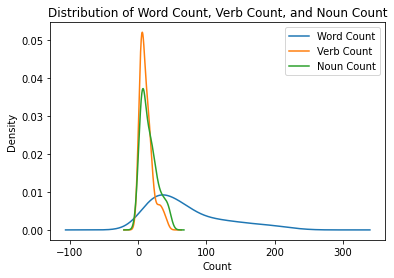

In [14]:
ax = data['word_count'].plot(kind='kde')
data['verb_count'].plot(kind='kde', ax=ax)
data['noun_count'].plot(kind='kde', ax=ax)

ax.legend(['Word Count', 'Verb Count', 'Noun Count'])
ax.set_title('Distribution of Word Count, Verb Count, and Noun Count')
ax.set_xlabel('Count')
ax.set_ylabel('Density')

plt.show()

We can observe from the above plot that the comments are generally short, but also include relatively longer comments.

At the present stage of the pre-processing, we haven't taken into consideration the misspelled words, which could be either intentional or unintentional. We shall rectify this at a later stage.

Knowing the distributions behind some of these properties is crucial because, once the synthetic data is created, we'll probably want it to adhere to the same distributions for certain textual characteristics.

In [15]:
data['words'] = data['text'].apply(nltk.word_tokenize)

# Get bigrams, trigrams and quadgrams for each row
data['bigrams']   = data['words'].apply(lambda x: list(ngrams(x, 2)))
data['trigrams']  = data['words'].apply(lambda x: list(ngrams(x, 3)))
data['quadgrams'] = data['words'].apply(lambda x: list(ngrams(x, 4)))

# Count the occurrences of bigrams, trigrams and quadgrams
bigram_counts   = Counter([gram for grams in data['bigrams'] for gram in grams])
trigram_counts  = Counter([gram for grams in data['trigrams'] for gram in grams])
quadgram_counts = Counter([gram for grams in data['quadgrams'] for gram in grams])

# Get the top 20 most common bigrams, trigrams, and quadgrams
most_common_bigrams   = bigram_counts.most_common(20)
most_common_trigrams  = trigram_counts.most_common(20)
most_common_quadgrams = quadgram_counts.most_common(20)

df_common_grams = pd.DataFrame()
df_common_grams['bigrams']   = most_common_bigrams
df_common_grams['trigrams']  = most_common_trigrams
df_common_grams['quadgrams'] = most_common_quadgrams

df_common_grams.iloc[:, :]

,bigrams,trigrams,quadgrams
0,"((of, the), 31)","((you, do, n't), 5)","((., I, think, the), 3)"
1,"((in, the), 23)","((., If, you), 5)","((the, rest, of, the), 3)"
2,"((is, a), 22)","((I, do, n't), 5)","((., If, you, mean), 2)"
3,"((do, n't), 19)","((., I, think), 4)","((is, one, of, the), 2)"
4,"((to, be), 17)","((to, be, the), 4)","((., Trump, is, a), 2)"
5,"((,, and), 17)","((., Trump, is), 4)","((?, You, do, n't), 2)"
6,"((., The), 15)","((I, think, the), 4)","((You, do, n't, see), 2)"
7,"((., I), 14)","((,, it, is), 3)","((was, in, the, wrong), 2)"
8,"((and, the), 14)","((,, and, the), 3)","((in, the, wrong, for), 2)"
9,"((to, the), 12)","((it, was, a), 3)","((the, media, has, only), 2)"


We will be ignoring the usual pre-processing step of converting the all characters to lower case as we would like the model to infer differences in the tone in which the comment was made. For instance some sentences/comments are made in all CAPS which usually indicate that the speaker is SHOUTING that comment, thereby treating that sentence as a toxic comment(although the severity is based on what was actually being said).

It takes more than simply the literal meaning of the words to communicate meaning when training sentiment-based models, or models where mood and emotion are expressed in some form, such as toxicity of comments. Punctuation and capitalization are particularly expressive forms of language, thus it is preferable to leave them in the data for these issues. We could also apply this to why although the trigrams and quadgrams show punctuation marks as most common, it is in our interest to not drop them from the data.

## Pre-processing of the data

We would first like to deal with the mis-spelled words. For the purpose of this project, we would only be visiting and replacing words of those which we believe would effect the learning of the model greatly and ignore the rather less toxic and generally mis-spelled words.

In [16]:
RE_PATTERNS = {
    ' fuck':
        [
            '(f)([^a-z]*)(u)([^a-z]*)(c)([^a-z]*)(k)',
            ' f[!@#\$%\^\&\*]*u[!@#\$%\^&\*]*k',
            ' f[!@#\$%\^\&\*]*u[!@#\$%\^&\*]*[ck]+[a-z@#\$%\^&\*]*'
            'f u u c',
            '(f)(c|[^a-z ])(u|[^a-z ])(k)',
            'feck ', ' fux ', 'f\*\*', 
            'f\-ing', 'f\.u\.', 'f###', ' fu ', 'f@ck', 'f u c k', 'f uck\b', '\bf ck\b','\bfuk\b', 'wtf','fucck','f cking', 'fcking'
        ],

    ' ass ':
        [
            '[^a-z]ass ', '[^a-z]azz ', 'arrse', ' arse ', '@\$\$'
                                                           '[^a-z]anus', ' a\*s\*s', '[^a-z]ass[^a-z ]',
            'a[@#\$%\^&\*][@#\$%\^&\*]', '[^a-z]anal ', 'a s s'
        ],

    ' asshole ':
        [
            ' a[s|z]*wipe', 'a[s|z]*[w]*h[o|0]+[l]*e', '@\$\$hole', 'ass hole'
        ],

    ' bitch ':
        [
            'b[w]*i[t]*ch', 'b!tch',
            'bi\+ch', 'b!\+ch', '(b)([^a-z]*)(i)([^a-z]*)(t)([^a-z]*)(c)([^a-z]*)(h)',
            'biatch', 'bi\*\*h', 'bytch', 'b i t c h','beetch'
        ],

    ' bastard ':
        [
            'ba[s|z]+t[e|a]+rd'
        ],

    ' transgender':
        [
            'trans gender'
        ],

    ' cock ':
        [
            '[^a-z]cock', 'c0ck', '[^a-z]cok ', 'c0k', '[^a-z]cok[^aeiou]', ' cawk',
            '(c)([^a-z ])(o)([^a-z ]*)(c)([^a-z ]*)(k)', 'c o c k'
        ],

    ' dick ':
        [
            ' dick[^aeiou]', 'deek', 'd i c k','diick ', 'd+\s?[\*i1!-]+\s?[\*c-]+\s?[\*k-]+'
        ],

    ' suck ':
        [
            'sucker', '(s)([^a-z ]*)(u)([^a-z ]*)(c)([^a-z ]*)(k)', 'sucks', '5uck', 's u c k'
        ],

    ' cunt ':
        [
             'c u n t', '\sc+[ -]?[@u*]+[ -]*[n*-]{1,3}\s?[t*-]'
        ],

    ' bullshit ':
        [
            'bullsh\*t', 'bull\$hit'
        ],

    ' homosexual':
        [
            'homo sexual','homosex'
        ],


    ' idiot ':
        [
            'i[d]+io[t]+', '(i)([^a-z ]*)(d)([^a-z ]*)(i)([^a-z ]*)(o)([^a-z ]*)(t)', 'idiots', 'i d i o t'
        ],

    ' dumb ':
        [
            '(d)([^a-z ]*)(u)([^a-z ]*)(m)([^a-z ]*)(b)'
        ],

    ' shit ':
        [
            'shitty', 's[ -]?[h*][ -]*[i!*][ -]*t+', 'shite', '\$hit\b', 's h i t'
        ],

    ' shithole ':
        [
            'shythole','shit hole'
        ],

    ' retard ':
        [
            'returd', 'retad', 'retard', 'wiktard', 'wikitud'
        ],

    ' dumbass':
        [
            'dumb ass', 'dubass'
        ],

    ' asshead':
        [
            'butthead', 'ass head'
        ],

    ' sex ':
        [
            's3x',
        ],


    ' nigger ':
        [
            'nigger', 'ni[g]+a', ' nigr ', 'negrito', 'niguh', 'n3gr', 'n i g g e r', '\sn+[ -]?[i*]+[ -]*[g*-]{1,3}[ae*-]+\s?[r*]?'
        ],

    ' shut the fuck up':
        [
            'stfu'
        ],

    ' pussy ':
        [
            'pussy[^c]', 'pusy', 'pussi[^l]', 'pusses', '\sp+[ -]?[u*]+[ -]*[$s*-]{1,3}\s?[yi]'
        ],

    ' faggot ':
        [
            'faggot', ' fa[g]+[s]*[^a-z ]', 'fagot', 'f a g g o t', 'faggit',
            '(f)([^a-z ]*)(a)([^a-z ]*)([g]+)([^a-z ]*)(o)([^a-z ]*)(t)', 'fau[g]+ot', 'fae[g]+ot',
        ],

    ' motherfucker':
        [
            ' motha ', ' motha f', ' mother f', 'motherucker', 'mother fucker'
        ],

    ' whore ':
        [
            'wh\*\*\*', 'w h o r e', '\sw+[ -]?[h*]+[ -]*[o*-]{1,3}\s?[r*]+\s?[e*]?'
        ],
    ' kill ':
        [
            '\sk+[ -]?[!1i*]+[ -]*[1l*-]{1,3}'
        ],
    ' cocksucker ':
        [
            '\sc+[ -]?[!o0*]+[ -]?[c*-]{1,3}[ -]?[*k-]+[ -]?[s*]+[u*]+[ -]?[a-z]*'
        ]
}

In [17]:
#As seen in general forums, users tend to use short forms for words, 
# which hamper the learning of the model. We would thus replace known words of such case.
def replace_abbrev(text):
    text = re.sub(r"what's", "what is ",text)    
    text = re.sub(r"\'ve", " have ",text)
    text = re.sub(r"(\w+)(n't)", r"\1 not ",text)
    text = re.sub(r"i'm", "i am ",text)
    text = re.sub(r"\'re", " are ",text)
    text = re.sub(r"\'d", " would ",text)
    text = re.sub(r"\'ll", " will ",text)
    text = re.sub(r"\'scuse", " excuse ",text)
    text = re.sub(r"\'s", " ",text)
     # complete -ing
    text = re.sub(r'(\w+in)(\')(\s)', r'\1g\3', text)
    return text

#There are a few cases in the reddit forums where users have accidentally used multiple punctuations, 
# we would like it the sentences to just retain the singular punctuation to imply the structure of the sentence.
def replace_multi_punc(text):
    text=re.sub(r'([.])\1\1{2,}',r' mpm ',text)
    text=re.sub(r'([!])\1\1{2,}',r' mxm ',text)
    text=re.sub(r'([?])\1\1{2,}',r' mqm ',text)
    text=re.sub(r'([*])\1\1{2,}',r'*',text)
    return text

def replace_url(text):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

#A few of the comments made on reddit include 
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)


def stem(text, stemmer=SnowballStemmer('english')):
    return ' '.join([stemmer.stem(t) for t in text.split()])    

def lemm(text, lemmatizer=WordNetLemmatizer()):
    tokens = nltk.tokenize.word_tokenize(text)                    
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

def clean(data, stem_on=False, lemm_on=True) -> str:
    data = data.lower()
    data = data.strip("\" ")
    
    data = replace_abbrev(data)
    # remove User:
    data = re.sub(r"(u|U)ser:[a-zA-Z\d]{3,15}", 'stmsr', data)
    # remove Date
    data = re.sub(r"([\d]{1,2}\s([jJ]an|[fF]eb|[mM]ar|[aA]pr|[mM]ay|[jJ]un|[jJ]ul|[aA]ug|[sS]ep|[oO]ct|[nN]ov|[dD]ec),?[a-z]{0,6},?\s[\d]{4}(\s?\([a-zA-Z]{3}\))?)", 'dttm', data)
    # remove time
    data = re.sub(r'[\d]{2}:[\d]{2}','dttm', data)
    
    data = replace_url(data)
    # Clean some punctutations
    data = re.sub('\n', ' ', data)
    # Remove ip address
    data = re.sub(r'(([0-9]+\.){2,}[0-9]+)','stmip', data)
    
    # Replace repeating characters more than 3 times to length of 3
    data = replace_multi_punc(data)
    # patterns with repeating characters 
    data = re.sub(r'([a-z])\1{2,}\b',r'\1\1', data)
    data = re.sub(r'([a-z])\1\1{2,}\B',r'\1\1\1', data)
            
    
    for target, patterns in RE_PATTERNS.items():
        for pat in patterns:
            data = re.sub(pat, target, data)
        
    data = emoji_pattern.sub(r'', data)
    # remove all special characters
    data = re.sub(r"[^a-z.!?\']", " ", data)
    
    # remove extra spaces
    data = re.sub('\s+', ' ', data)
    
    # stem
    if stem_on:
        data = stem(data)
    
    if lemm_on:
        data = lemm(data)
        
    return data


def simple_clean(data, lemm_on):
    data = data.lower()
    data = data.strip("\" ")
    
    data = replace_abbrev(data)
    # remove User:
    data = re.sub(r"(u|U)ser:[a-zA-Z\d]{3,15}", 'stmsr', data)
    # remove all special characters
    data = re.sub(r"[^a-z.!?\']", " ", data)
    
    data = emoji_pattern.sub(r'', data)
    # remove extra spaces
    data = re.sub('\s+', ' ', data)
    if lemm_on:
        data = lemm(data)
        
    return data

### Setting up the data for training the BERT model

In [18]:
#Here we use the hugging face version of the uncased BERT model 
BERT_NAME = 'bert-base-uncased'
MAX_LEN = 400
BATCH_SIZE = 8
VAL_SPLIT = 0.2
N_EPOCH = 14 * 3
DEVICE = 'cuda'
LEARNING_RATE = 5e-4

In [19]:
tokenizer = BertTokenizerFast.from_pretrained(BERT_NAME)
#Tokenize the data
def get_tokenize_func(column_name):
    def tokenize_func(examples):
        return tokenizer(examples[column_name], 
                         padding="max_length", 
                         truncation=True, 
                         add_special_tokens=True,
                         max_length=MAX_LEN,
                         return_token_type_ids=False,
                         return_attention_mask=True)
    return tokenize_func
#We shall also reference the above functions that helps clean the data and substitute the words wherever necessary
def get_clean_column_func(column_name):
    def func(ds):
        ds[column_name] = clean(ds[column_name])
        return ds
    return func

In [20]:
contest_test_ds = load_dataset('csv', data_files='jigsaw-toxic-severity-rating/comments_to_score.csv') 
contest_test_ds = contest_test_ds.map(get_clean_column_func('text'))
contest_test_ds = contest_test_ds.map(get_tokenize_func("text"), batched=False)
#Prepare the data for training the model
contest_test_ds['train'].set_format(type='torch', columns=['input_ids', 'attention_mask'])
contest_test_dataloader = torch.utils.data.DataLoader(contest_test_ds['train'], batch_size=32)

In [21]:
df = pd.read_csv('jigsaw-toxic-comment-classification-challenge/train.csv')
df = df.rename(columns={"comment_text": "comment"})
df = df.drop(columns=['id'])
df.reset_index(drop=True, inplace=True)
#apply the cleaning of data fix throughout the dataset after dropping all unnecessary columns
df['comment'] = df['comment'].progress_apply(clean)

  0%|          | 0/159571 [00:00<?, ?it/s]

In [22]:
def add_all(row):
    toxicity = row[1:].sum()
    if toxicity > 0:
        return 0
    else:
        return 1
#Applying the above utility function throughout the data to sum all columns with varying toxicity levels to identify non-toxic comments
df['nontoxic'] = df.progress_apply(add_all, axis='columns')
df.head()

lens = np.array(list(map(lambda x: len(x), df['comment'])))

new_df = pd.concat([df[np.logical_and(df['nontoxic'] == 1, lens > 45)].sample((df['nontoxic'] == 0).sum()), df[df['nontoxic'] == 0]])
new_df = new_df.sample(frac=1).reset_index(drop=True)

  0%|          | 0/159571 [00:00<?, ?it/s]

In [23]:
#Utility function to ease the application of logic over the data
def gather_labels(row):
    return 1 - row

new_df['labels'] = new_df[['nontoxic']].progress_apply(gather_labels, axis=1)
new_df = new_df.drop(columns=['identity_hate', 'obscene', 'toxic', 'insult', 'threat', 'severe_toxic', 'nontoxic'])

  0%|          | 0/32450 [00:00<?, ?it/s]

In [24]:
classification_ds = Dataset.from_pandas(new_df)
classification_ds = classification_ds.train_test_split(VAL_SPLIT)
classification_ds = classification_ds.map(get_tokenize_func("comment"), batched=True)
# This step specifies the columns to be used and the data type (torch tensors)
classification_ds.set_format(type='torch', columns=['attention_mask', 'input_ids', 'labels'])

Map:   0%|          | 0/25960 [00:00<?, ? examples/s]

Map:   0%|          | 0/6490 [00:00<?, ? examples/s]

In [25]:
#Loading the validation dataset for the evaluation of the model
contest_val_ds = load_dataset('csv', data_files='jigsaw-toxic-severity-rating/validation_data.csv') 
contest_val_ds = contest_val_ds.map(get_clean_column_func('less_toxic'))
contest_val_ds = contest_val_ds.map(get_clean_column_func('more_toxic'))

contest_val_ds = contest_val_ds.map(get_tokenize_func("less_toxic"), batched=False)
contest_val_ds = contest_val_ds.map(lambda example: {'less_attention_mask': example['attention_mask'], 'less_input_ids': example['input_ids']}, 
                                     remove_columns=['attention_mask', 'input_ids'])

contest_val_ds = contest_val_ds.map(get_tokenize_func("more_toxic"), batched=False)
contest_val_ds = contest_val_ds.map(lambda example: {'more_attention_mask': example['attention_mask'], 'more_input_ids': example['input_ids']}, 
                                     remove_columns=['attention_mask', 'input_ids'])

In [26]:
#Combine the coloumns and convert them into PyTorch format for evaluation
contest_val_ds['train'].set_format(type='torch', columns=['less_input_ids', 'less_attention_mask', 'more_input_ids', 'more_attention_mask'])
contest_val_dataloader = torch.utils.data.DataLoader(contest_val_ds['train'], batch_size=BATCH_SIZE)

### Training the BERT model
To fine-tune the BERT model for this classification task, most of the model's layers are frozen, except for those directly related to the classifier. This ensures that only the classifier layers will be updated during training, leveraging the knowledge already captured by the pre-trained BERT architecture.

The training process is configured using the TrainingArguments class, which specifies various training settings like the learning rate, batch size, and evaluation strategy. A Trainer instance is then created, which encapsulates the model, training arguments, and the training and evaluation datasets. When the trainer.train() method is called, the model undergoes training on the provided training dataset while periodically evaluating its performance on the evaluation dataset.

K-fold Cross Validation Strategy:(k = 14)

It is here where the Trainer class that we have employed periodically changes the training and the evaluation datasets for each iteration/epoch and automatically saves the best-performing model as the output based on the results. We have set a relatively higher k value for the k-fold cross validation in order to ensure that the values are not co-incidental and project the models performance. As observed below, the model performs almost equally well throughout with a loss varying between 0.27 and 0.35.

In [27]:
configuration = BertConfig(classifier_dropout=0.003)
#configuration = BertConfig()
configuration.num_labels = 2
model = BertForSequenceClassification.from_pretrained(BERT_NAME, config=configuration)

# freezing all layers but the classifier
for name, param in model.named_parameters():
    if 'classifier'  not in name:
        param.requires_grad = False 
        
training_args = TrainingArguments("test_trainer",learning_rate=LEARNING_RATE, num_train_epochs=N_EPOCH, evaluation_strategy='epoch', save_strategy='epoch', load_best_model_at_end=True, per_device_train_batch_size=BATCH_SIZE, per_device_eval_batch_size=BATCH_SIZE, save_total_limit=1)
trainer = Trainer(model=model, args=training_args, train_dataset=classification_ds['train'], eval_dataset=classification_ds['test'])
trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/home/ubuntu/.local/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.351000,0.331009
2,0.335600,0.313596
3,0.335300,0.301079
4,0.317000,0.295790
5,0.314400,0.303829
6,0.322200,0.321202
7,0.308800,0.290403
8,0.312900,0.284980
9,0.305900,0.281667
10,0.324600,0.280791


TrainOutput(global_step=136290, training_loss=0.3040710943514397, metrics={'train_runtime': 8768.4605, 'train_samples_per_second': 124.346, 'train_steps_per_second': 15.543, 'total_flos': 2.2412128584384e+17, 'train_loss': 0.3040710943514397, 'epoch': 42.0})

In [28]:
# We shall now use the validation data to test the performance of the model and store the models scores.
def validate_model(model, dataloader):
    loss = 0
    model.eval()
    model.to(DEVICE)
    less_classes = []
    more_classes = []
    with torch.no_grad(): #The model's weights would not be affected by running the below loop, hence not affecting the models parameters
        for _, data in tqdm(enumerate(dataloader), total=len(dataloader)):
            less_classes += list(model(data['less_input_ids'].to(DEVICE), data['less_attention_mask'].to(DEVICE)).logits.cpu().detach().numpy())
            more_classes += list(model(data['more_input_ids'].to(DEVICE), data['more_attention_mask'].to(DEVICE)).logits.cpu().detach().numpy())
    return np.array([score.argmax() for score in less_classes], dtype=np.float), np.array([score.argmax() for score in more_classes], dtype=np.float)

bert_val_scores = validate_model(model, contest_val_dataloader)

  0%|          | 0/3764 [00:00<?, ?it/s]

<ipython-input-28-2c820b9e5bb7>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array([score.argmax() for score in less_classes], dtype=np.float), np.array([score.argmax() for score in more_classes], dtype=np.float)


In [29]:
#After performing the analysis on the validation data, we shall now run the model over the evaluation data we had previously loaded 
# and cleaned to evaluate the performance of the model.
model.eval()
model.to(DEVICE)
all_scores = []
with torch.no_grad(): #The model's weights would not be affected by running the below loop, hence not affecting the models parameters
    for _, data in tqdm(enumerate(contest_test_dataloader), total=len(contest_test_dataloader)):
        all_scores += list(model(data['input_ids'].to(DEVICE), data['attention_mask'].to(DEVICE)).logits.cpu().detach().numpy())
bert_test_scores = np.array([score.argmax() for score in all_scores])

  0%|          | 0/236 [00:00<?, ?it/s]

In [36]:
torch.save(model,'BERT_model.pt')

We shall now train a model based on Term Frequency and Inverse Document Frequency to extrapolate the scores of the final comment to classify them as less toxic or more toxic.

In [41]:
#Reloading a fresh copy of the dataset and keeping intact the comment-id along with the comments to have an idea of which comment is being scored.
df = pd.read_csv('jigsaw-toxic-comment-classification-challenge/train.csv')
df = df.rename(columns={"comment_text": "comment"})
df = df.drop(columns=['id'])
df.reset_index(drop=True, inplace=True)

In [42]:
#Utility functions with the same purpose as used previously
def add_all(row):
    toxicity = row[1:].sum()
    if toxicity > 0:
        return 0
    else:
        return 1

#Utility functions with the same purpose as used previously
def gather_labels(row):
    return np.dot(label_weights, np.array(row.values))

#Applying the above utility function throughout the data to sum all columns with varying toxicity levels to identify non-toxic comments
df['nontoxic'] = df.apply(add_all, axis='columns')

lens = np.array(list(map(lambda x: len(x), df['comment'])))
new_clf_df = pd.concat([df[np.logical_and(df['nontoxic'] == 1, lens > 25)].sample((df['nontoxic'] == 0).sum(), random_state=42), df[df['nontoxic'] == 0]])
new_clf_df = new_clf_df.sample(frac=1, random_state=42).reset_index(drop=True)

#Initializing with random weights to begin the training. This allows the model to start fitting from a relatively lower loss 
# as opposed to if the model had to learn of the weights from the get go.
new_clf_df['comment'] = new_clf_df['comment'].apply(clean)
labels = ['obscene', 'threat', 'insult', 'identity_hate', 'toxic', 'severe_toxic']
label_weights = np.array([0.06, 0.09, 0.13, 0.15, 0.45, 0.25]) #We have arrived at these weights after initial experimentation with different configurations.
#The above approach is popularly used to effectively train the models without wasting resources. 

new_clf_df['score'] = new_clf_df[labels].apply(gather_labels, axis=1)
new_clf_df = new_clf_df.drop(columns=labels)
new_clf_df = new_clf_df.drop(columns=['nontoxic'])

In [44]:
#In addition to the dataset obtained from one source, we are also making use of the dataset obtained from web scrapping reddit forums.
#The comments thus obtained in addition to the original dataset would allow us to remove any unintended bias if existing in the original dataset.
df = pd.read_csv("ruddit-jigsaw-dataset/Dataset/ruddit_with_text.csv")
df = df[df['txt'] != '[deleted]']
df = df.drop(columns=['post_id', 'comment_id', 'url'])
df.reset_index(drop=True, inplace=True)
df = df.rename(columns={"txt": "comment", "offensiveness_score" : "score"})
df["comment"] = df["comment"].apply(clean)

df['score'] = df['score'].apply(lambda x: x if x > 0 else 0 )
ruddit_df = df
ruddit_df

,comment,score
0,the difference in average earnings between men...,0.000
1,the myth is that the gap is entirely based on ...,0.000
2,the assertion is that woman get paid le for th...,0.000
3,you said in the op that not what they are meas...,0.000
4,men and woman are not payed le for the same jo...,0.000
...,...,...
5717,they should only censor thing that talk badly ...,0.064
5718,and one of them is a woman . oh shit we better...,0.458
5719,how is this flared a u politics,0.000
5720,people in hong kong must decide if they are go...,0.333


In [46]:
#Reload the validation set, but this time we would use just a part of the validation set unlike the previous k-fold validation approach.
val_df = pd.read_csv('jigsaw-toxic-severity-rating/validation_data.csv')
val_df['less_toxic_clean'] = val_df['less_toxic'].apply(clean)
val_df['more_toxic_clean'] = val_df['more_toxic'].apply(clean)

In [47]:
#Train the new model
def train_model(train_df, tfidf_vec):
    train_tfidf = tfidf_vec.transform(train_df['comment'].values.tolist())
    train_y = train_df["score"].values
    model = linear_model.Ridge(alpha=0.01)
    model.fit(train_tfidf, train_y)
    return model

#Validation of the new model
def validate(model, tfidf_vec, val_df):
    comment1 = val_df['less_toxic_clean'].values
    comment2 = val_df['more_toxic_clean'].values

    comm1 = tfidf_vec.transform(comment1)
    comm2 = tfidf_vec.transform(comment2)

    pred1 = np.array(model.predict(comm1))
    pred2 = np.array(model.predict(comm2))

    t = sorted(np.abs(pred1 - pred2))
    score_diffs = np.array(t[1:]) - np.array(t[:-1])
    val_df2 = pd.read_csv('jigsaw-toxic-severity-rating/validation_data.csv')

    updated_pred1 = pred1 
    updated_pred2 = pred2 
    
    return updated_pred1, updated_pred2

#This function is used to score the comments based on the toxic class it belongs to
def vote(val_preds, model_weights, toxic_classes, base_score):
    res = np.stack([t[0]  + base_score * toxic_classes[0] < t[1] + base_score * toxic_classes[1] for t in val_preds], axis=1)
    threshold = len(val_preds) / 2
    
    votes = 0
    for r in res:
        if np.dot(r, np.array(model_weights)) >= np.dot(np.ones(len(r)), np.array(model_weights)) / 2:
            votes += 1
            
    return votes / len(res)

In [48]:
#Combining the two sets of data and training the model using the tf-idf method. 
#We shall generate a series of models and save all the models using varied configurations.
dataframes = [new_clf_df, ruddit_df]
params = [{'analyzer': 'char_wb', 'ngram_range': (3, 4), 'sublinear_tf': True}, {'analyzer': 'word', 'ngram_range': (1, 2), 'sublinear_tf': True}]
models = []
val_preds = []
vecs = []
for df in dataframes:
    for param in params:
        tfidf_vec = TfidfVectorizer(stop_words='english', **param)
        tfidf_vec.fit_transform(df['comment'].values.tolist())
        model = train_model(df, tfidf_vec)
        models.append(model)
        vecs.append(tfidf_vec)
        val_preds.append(validate(model, tfidf_vec, val_df))

In [50]:
#Based on all the above models generated, we shall now figure out what is the best base score and it's concurrent model weights.
base_scores = np.linspace(0.15, 1, 3)
best_base_score = 0
max_val_score = 0
best_regr_weights = [0] * len(val_preds)
for base_score in base_scores:
    for model_weights in list(itertools.product(np.linspace(0.1, 1, 3), repeat=len(val_preds))):
        val_score = vote(val_preds, model_weights, bert_val_scores, base_score)
        if val_score > max_val_score:
            max_val_score = val_score
            best_base_score = base_score
            best_regr_weights = model_weights

print("Validation score: ", max_val_score, "\nBase score: ", best_base_score, "\nModel weights: ", best_regr_weights)

Validation score:  0.7437558124086622 
Base score:  0.15 
Model weights:  (0.1, 0.1, 0.1, 0.1)


### Training the miniGPT
We shall now use the data from above to train a generative model that generates a toxic comment. This will be used to compliment the existing trained classification model to test if the model can identify varied types of toxic comments both generated by bots and humans in varied forms.

In [16]:
#For the first configuration, we have employed the use of the below parameters
vocab_size = 50000  ## Only consider the top 20k words
maxlen = 80  ## Max sequence length
batch_size = 128  ## Data loading batch sizes

# Create a dataset from the pandas column
text_ds = tf.data.Dataset.from_tensor_slices(text_column)

# Shuffle and batch the dataset
text_ds = text_ds.shuffle(buffer_size=128)
text_ds = text_ds.batch(batch_size)

## Create a vectorization layer and adapt it to the text
vectorize_layer = TextVectorization(
    standardize=None,
    max_tokens=vocab_size - 1,
    output_mode="int",
    output_sequence_length=maxlen + 1,
)
vectorize_layer.adapt(text_ds)
vocab = vectorize_layer.get_vocabulary()  ## To get words back from token indices

In [17]:
## Function to create target column
def prepare_lm_inputs_labels(text):
    #Shift word sequences by 1 position so that the target for position (i) is word at position (i+1). 
    # The model will use all words up till position (i) to predict the next word.
    
    text = tf.expand_dims(text, -1)
    tokenized_sentences = vectorize_layer(text)
    x = tokenized_sentences[:, :-1]
    y = tokenized_sentences[:, 1:]
    return x, y

text_ds = text_ds.map(prepare_lm_inputs_labels)
text_ds = text_ds.prefetch(tf.data.AUTOTUNE)

In [18]:
## Select samples from the training data set to inspect
sample = text_ds.take(3) 

## Display some samples
for x, y in sample:
    # Convert token indices back to words
    input_words  = [vocab[i] for i in x[0].numpy()]
    target_words = [vocab[i] for i in y[0].numpy()]

    print("\n\n\n\nInput Sequence:")
    print(" ".join(input_words))
    print("\nTarget Sequence:")
    print(" ".join(target_words))





Input Sequence:
" I already gave you the source for all my edits The [UNK] [UNK] so I will not continue to play your little game. If you weren't so lazy and intent on harassment, you could use Google to search for [UNK] and [UNK] You get more than 400 hits including white supremacist sites and an academic paper dating to 1996. It's obviously a real slur with some usage. Nice try at being [UNK] though. I'm sure there's a slur that

Target Sequence:
I already gave you the source for all my edits The [UNK] [UNK] so I will not continue to play your little game. If you weren't so lazy and intent on harassment, you could use Google to search for [UNK] and [UNK] You get more than 400 hits including white supremacist sites and an academic paper dating to 1996. It's obviously a real slur with some usage. Nice try at being [UNK] though. I'm sure there's a slur that describes




Input Sequence:
" I'd say [UNK] [UNK] is not heavy metal but hard rock, although since there are no good [UNK] hea

#### Implementing the Attention Mask and the Transformer blocks, along with the embedding layers

In [37]:
def causal_attention_mask(batch_size, n_dest, n_src, dtype):
    """
    Creates a mask for causal (auto-regressive) self-attention. The returned mask has the shape 
    [batch_size, n_dest, n_src], where each entry at position (i, j, k) will be 1 if j >= k and 0 otherwise. 
    This is used to prevent the attention mechanism from attending to future positions during the forward pass.

    Args:
        batch_size (int): Number of sequences in each batch.
        n_dest (int): Number of destination attention heads.
        n_src (int): Number of source attention heads.
        dtype (tf.DType): Type of the output tensor.

    Returns:
        tf.Tensor: A tensor of shape [batch_size, n_dest, n_src] representing the mask.
    """

    # Create two range tensors i and j, where i has shape [n_dest, 1] and j has shape [n_src]
    i = tf.range(n_dest)[:, None]
    j = tf.range(n_src)

    # Create a mask where entry (i, j) is True if i >= j - n_src + n_dest and False otherwise
    m = i >= j - n_src + n_dest

    # Cast the mask to the desired data type
    mask = tf.cast(m, dtype)

    # Reshape the mask to have shape [1, n_dest, n_src]
    mask = tf.reshape(mask, [1, n_dest, n_src])

    # Create a tensor with shape [2] that represents the multiples for tiling
    mult = tf.concat(
        [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)], 0
    )

    # Tile the mask tensor to have shape [batch_size, n_dest, n_src]
    return tf.tile(mask, mult)



class TransformerBlock(layers.Layer):
    """
    A Transformer block that includes multi-head self-attention and a feed-forward neural network.
    Each of these two components has a residual connection and is followed by layer normalization.

    Attributes:
        att (layers.MultiHeadAttention): Multi-head self-attention layer.
        ffn (keras.Sequential): Feed-forward neural network.
        layernorm1 (layers.LayerNormalization): Layer normalization after the self-attention.
        layernorm2 (layers.LayerNormalization): Layer normalization after the feed-forward network.
        dropout1 (layers.Dropout): Dropout layer after the self-attention.
        dropout2 (layers.Dropout): Dropout layer after the feed-forward network.
    """
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):
        """
        Initializes the Transformer block.

        Args:
            embed_dim (int): Dimensionality of the input embeddings.
            num_heads (int): Number of attention heads.
            ff_dim (int): Number of units in the hidden layer of the feed-forward network.
            rate (float): Dropout rate.
        """
        super().__init__( **kwargs)
        self.att = layers.MultiHeadAttention(num_heads, embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)
        
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.ff_dim = ff_dim
        self.rate = rate

    def call(self, inputs):
        """
        Forward pass of the Transformer block.

        Args:
            inputs (tf.Tensor): Input tensor of shape [batch_size, seq_len, embed_dim].

        Returns:
            tf.Tensor: Output tensor of shape [batch_size, seq_len, embed_dim].
        """
        # Compute the shapes
        input_shape = tf.shape(inputs)
        batch_size = input_shape[0]
        seq_len = input_shape[1]

        # Create the causal mask for the multi-head self-attention
        causal_mask = causal_attention_mask(batch_size, seq_len, seq_len, tf.bool)

        # Compute the output of the multi-head self-attention
        attention_output = self.att(inputs, inputs, attention_mask=causal_mask)

        # Apply dropout to the attention output
        attention_output = self.dropout1(attention_output)

        # Add the attention output to the inputs (residual connection) and normalize the result
        out1 = self.layernorm1(inputs + attention_output)

        # Compute the output of the feed-forward network
        ffn_output = self.ffn(out1)

        # Apply dropout to the feed-forward output
        ffn_output = self.dropout2(ffn_output)

        # Add the feed-forward output to the previous output (residual connection) and normalize the result
        return self.layernorm2(out1 + ffn_output)
    
    def get_config(self): # 5
        config = super().get_config()
        # save constructor args
        config['embed_dim'] = self.embed_dim
        config['num_heads'] = self.num_heads
        config['ff_dim'] = self.ff_dim
        config['rate'] = self.rate
        return config

TokenAndPositionEmbedding implements a layer for merging token and positional embeddings in sequences. Token embeddings encode token meanings, while positional embeddings encode token positions. Parameters include sequence length, vocabulary size, and embedding dimensions. The layer computes token and positional embeddings separately, combining them to produce an output tensor with enriched embeddings.

In [96]:
class TokenAndPositionEmbedding(layers.Layer):
    """
    Layer for combining token and positional embeddings. Token embeddings provide the model
    with understanding of the meaning of each token, while positional embeddings provide
    information about the position of each token in the sequence.

    Attributes:
        token_emb (layers.Embedding): Token embedding layer.
        pos_emb (layers.Embedding): Position embedding layer.
    """

    def __init__(self, maxlen, vocab_size, embed_dim, name=None, **kwargs):
        super(TokenAndPositionEmbedding, self).__init__(**kwargs)
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim)
        
        self.maxlen = maxlen
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, x):
        """
        Forward pass of the TokenAndPositionEmbedding layer.

        Args:
            x (tf.Tensor): Input tensor of shape [batch_size, seq_len].

        Returns:
            tf.Tensor: Output tensor of shape [batch_size, seq_len, embed_dim], resulting from
            adding token embeddings and position embeddings.
        """
        # Compute the maximum sequence length
        maxlen = tf.shape(x)[-1]

        # Create a range tensor representing positions
        positions = tf.range(start=0, limit=maxlen, delta=1)

        # Compute the position embeddings
        positions = self.pos_emb(positions)

        # Compute the token embeddings
        x = self.token_emb(x)

        # Add the token embeddings and position embeddings
        return x + positions
    
    def get_config(self): # 5
        config = super().get_config()
        # save constructor args
        config['maxlen'] = self.maxlen
        config['vocab_size'] = self.vocab_size
        config['embed_dim'] = self.embed_dim
        return config

### Hyperparameters

Setting embed_dim and feed_forward_dim to 512 results in a 105M parameter model, whereas using lower value 256 creates a 52M parameter model. Throughout training, the 105M model achieves a loss of 0.4544, whereas the 52M parameter model exhibits a loss of 0.7219. Despite increasing the number of heads to 4, the loss didn't improve significantly; thus, we decided to retain the value at 2.

In [39]:
maxlen = 80  # Max sequence size
embed_dim = 512  # Embedding size for each token
num_heads = 2  # Number of attention heads
feed_forward_dim = 512  # Hidden layer size in feed forward network inside transformer

In [40]:
def MiniGPT():
    """
    Constructs a mini version of the GPT model. The architecture is comprised of a
    token and position embedding layer followed by a single Transformer block. The final
    layer is a dense layer with softmax activation for prediction. 

    Returns:
        keras.Model: Mini GPT model.
    """

    # Input layer expects inputs of shape (maxlen,) with type int32
    inputs = layers.Input(shape=(maxlen,), dtype=tf.int32)

    # Create the token and position embedding layer and compute the embeddings
    embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
    x = embedding_layer(inputs)

    # Create the Transformer block and compute its output
    transformer_block = TransformerBlock(embed_dim, num_heads, feed_forward_dim)
    x = transformer_block(x)

    # Final dense layer with size equal to the vocabulary size
    outputs = layers.Dense(vocab_size)(x)

    # Construct the Keras model
    model = keras.Model(inputs=inputs, outputs=[outputs, x])

    # Loss function for the training 
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    # Model compilation: use Adam optimizer and the defined loss function
    # Note that we specify `None` for the second loss to not optimize based on the Transformer block's output
    model.compile("adam", loss=[loss_fn, None])
    model.summary()

    return model

In [41]:
## Tokenize starting prompt
word_to_index = {}
for index, word in enumerate(vocab):
    word_to_index[word] = index

In [71]:
class TextGenerator(keras.callbacks.Callback):
    global generated_texts
    """
    A callback to generate text from a trained model at the end of each epoch. It uses the model's 
    predictions to sample a token, add it to the input, and generate subsequent tokens.

    Attributes:
        max_tokens (int): The number of tokens to be generated after the prompt.
        start_tokens (list): The token indices for the starting prompt.
        index_to_word (list): Mapping from token indices to words, obtained from the TextVectorization layer.
        k (int): Number of token predictions to consider for sampling the next token.
        print_every (int): Frequency of print for the generated text (in number of epochs).
    """
    def __init__(self, max_tokens, start_tokens, index_to_word, top_k=20, print_every=1,**kwargs):
        """
        Initializes the TextGenerator callback.

        Args:
            max_tokens (int): Maximum number of tokens to be generated.
            start_tokens (list): List of integers representing the starting tokens.
            index_to_word (list): List of strings representing the mapping from indices to words.
            top_k (int, optional): Number of top token predictions to sample from. Defaults to 10.
            print_every (int, optional): Frequency of print (in number of epochs). Defaults to 1.
        """
        super().__init__(**kwargs)
        self.max_tokens = max_tokens
        self.start_tokens = start_tokens
        self.index_to_word = index_to_word
        self.k = top_k
        self.print_every = print_every
        self.generated_texts = [] # for qualitative validation set

    def sample_from(self, logits):
        """
        Sample a token index from the token predictions based on their probabilities.

        Args:
            logits (tf.Tensor): The token predictions (logits) of the model.

        Returns:
            int: The sampled token index.
        """
        # Select top-k logits and their indices
        logits, indices = tf.math.top_k(logits, k=self.k, sorted=True)
        indices = np.asarray(indices).astype("int32")

        # Apply softmax to transform logits into probabilities
        preds = keras.activations.softmax(tf.expand_dims(logits, 0))[0]
        preds = np.asarray(preds).astype("float32")

        # Randomly select an index according to the probability distribution
        return np.random.choice(indices, p=preds)

    def detokenize(self, number):
        """
        Convert a token index into the corresponding word.

        Args:
            number (int): The token index.

        Returns:
            str: The corresponding word.
        """
        return self.index_to_word[number]

    def on_epoch_end(self, epoch, logs=None):
        """
        At the end of each epoch, generate text and print it.

        Args:
            epoch (int): The current epoch number.
            logs (dict, optional): Dictionary of metrics from the epoch. Defaults to None.
        """
        # Create a copy of start tokens for generation
        start_tokens = [_ for _ in self.start_tokens]

        # Only generate text at specified frequency
        if (epoch + 1) % self.print_every != 0:
            return

        num_tokens_generated = 0
        tokens_generated = []

        # Generate tokens until max tokens reached
        while num_tokens_generated <= self.max_tokens:
            pad_len = maxlen - len(start_tokens)
            sample_index = len(start_tokens) - 1

            # Adjust padding based on length of start tokens
            if pad_len < 0:
                x = start_tokens[:maxlen]
                sample_index = maxlen - 1
            elif pad_len > 0:
                x = start_tokens + [0] * pad_len
            else:
                x = start_tokens

            x = np.array([x])

            # Use the model to predict the probabilities for the next token
            y, _ = loaded_model.predict(x)

            # Sample a token from the model's output distribution
            sample_token = self.sample_from(y[0][sample_index])

            # Append the token to the list of generated tokens
            tokens_generated.append(sample_token)

            # Add the token to the start tokens for the next generation
            start_tokens.append(sample_token)

            # Increase the number of tokens generated by 1
            num_tokens_generated = len(tokens_generated)

        # Convert the tokens into actual words and join them into a string
        txt = " ".join(
            [self.detokenize(_) for _ in self.start_tokens + tokens_generated]
        )
        
        self.generated_texts.append((epoch, txt)) # Store for evalutation after training


        # Print the generated text
        print(f"generated text:\n{txt}\n")

In [99]:
start_prompt = "I would have"
#With the help of a start token, the generator would use them as starting of the sentence tokens, similar to <s>
start_tokens = [word_to_index.get(_, 1) for _ in start_prompt.split()]
num_tokens_generated = 42
text_gen_callback = TextGenerator(num_tokens_generated, start_tokens, vocab)
text_gen_callback_print = text_gen_callback.generated_texts #A method to extract the generated texts

In [100]:
# load the saved model
with tf.keras.utils.custom_object_scope({'TokenAndPositionEmbedding': TokenAndPositionEmbedding,
                                        'TransformerBlock': TransformerBlock}):
    loaded_model = tf.keras.models.load_model('Toxic_MiniGPT_256.keras')

In [ ]:
model = MiniGPT()

# Define the number of training epochs
N_EPOCHS = 3

# Initialize a TQDM progress bar callback for visualizing training progress
tqdm_callback = tfa.callbacks.TQDMProgressBar()

# Train the model using the provided text dataset
history  = model.fit(text_ds, verbose=0, epochs=N_EPOCHS, callbacks=[tqdm_callback])

We believe that the above parameters used demonstrated the best casae scenario whereby the model fit satisfactorily.
But in order to arrive with these configurations we had to perform Trial and error on various other configurations as depicted below:

Model 1:
We used a feed_forward_dim = 256 and an embed_dim = 256. While the vocab_size = 100000 and retaining a batch size of 128, we were able to generate a total trainable parameter as close to 52,000,000. This resulted in a rather underfit model with a loss of about 0.7219. As depicted by the concurrent graph shown in the report, we observe a steep decrease in the loss in the first 2 epochs, but rather slows down due to the self-adjusting feature of the learning function used.

Model 2:
We used a feed_forward_dim = 256 and an embed_dim = 256. While the vocab_size = 100000 and retaining a batch size of 128 but with the variation of the optimizer, using the stochastic gradient optimizer, we were able to generate a total trainable parameter as close to 52,000,000. This resulted in a rather underfit model with a loss of about 5.3101. As depicted by the concurrent graph shown in the report, we observe a steep decrease in the loss in the first 2 epochs, but rather saturates for the rest of the epochs during traiing, thereby proving to be a bad optimizer for our purpose. 

Model 3:
We used a feed_forward_dim = 256 and an embed_dim = 256. While the vocab_size = 50000 and retaining a batch size of 128 but with the variation of the optimizer, using the Adam, we were able to generate a total trainable parameter as close to 26,000,000. Reducing the vocabulary size deteriorated the loss value to 1.0087, as the number of trainable parameters decreased from 52,000,000 to 26,000,000. The model exhibiited signs of underfitting.

Model 4:
We used a feed_forward_dim = 256 and an embed_dim = 256. While the vocab_size = 100000 and retaining a batch size of 128 but with the variation of the optimizer, using the AdaGrad, we were able to generate a total trainable parameter as close to 52,000,000. The model began to underfit after 10 epochs. This occurred because the learning rate of the AdaGrad optimizer became too small, preventing the loss function from converging. The loss value stands at 4.7924.

Model 5:
We used a feed_forward_dim = 256 and an embed_dim = 256. While the vocab_size = 100000 and retaining a batch size of 128, we were able to generate a total trainable parameter as close to 52,000,000. When going through articles we found that the optimizer LAMB performed similarly to the Adam optimizer and even performed better in some cases, but in our case the graph depicted a rather inconsistent learning of the model thereby underfitting with a loss of about 2.3981. As depicted by the concurrent graph shown in the report, we observe that the model was learning inconsistently throughout the training phase.

Model 6:
We used a feed_forward_dim = 256 and an embed_dim = 256. While the vocab_size = 200000 and retaining a batch size of 128, we were able to generate a total trainable parameter as close to 103,300,000. This resulted in an almost perfect model, except that it had just started to overfit with a loss of about 0.5981. As depicted by the concurrent graph shown in the report, we observe that the model was learning almost at a constant rate thereby proving to be a smoother fit due to the self-adjusting feature of the learning function used(adam). By this time, we had realised that the Adam optimizer proved to be a good optimizer for our purpose.

Model 7:
After arriving at an optimal optimizer, our next objective was to boil down to a good batch_size. As known the size of the batch used for training plays an important role in helping the model figure out underlying relations, we tried increasing the batch_size to 256, retaining the other parameters as is. This reultant in a total of 52,000,000 trainable parameters. But with a loss of close to 1.0906, the model resulted in underfitting.

Model 8:
We used a feed_forward_dim = 256 and an embed_dim = 256. While the vocab_size = 100000 and retaining a batch size of 64 but with the variation of the optimizer, using the Adam, we were able to generate a total trainable parameter as close to 52,000,000. The model exhibited signs of overfitting, as reducing the batch size resulted in fluctuations during gradient calculation. A larger batch size is likely to lead to a smoother loss function. This lead us to come back to original batch size of 128 which we finalised as the optimal batch size for our purpose. The loss value stands at 0.6012.

Model 9:
We used a feed_forward_dim = 256 and an embed_dim = 256. While the vocab_size = 100000 and retaining a batch size of 128, we were able to generate a total trainable parameter as close to 52,000,000. Increasing number of heads did not lead any significant imporvement in loss value. The lack of substantial improvement in the loss value despite increasing the number of heads could be due to the diminishing returns of scaling up attention heads in a transformer model. The loss value stands at 0.6924.

Model 10:
After thorough consideration of all such training approachs and training all of these models on specialised dedicated GPUs, we arrived at the configuration as trained above.

In [ ]:
# Plot training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.title('Training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

![alt text](train_graph.jpg)

In [102]:
# Set the maximum length for generated text sequences
maxlen = 80
vocab = []

# Initialize an empty list to store vocabulary words
with open('vocabulary.txt', 'r') as f:
    for line in f:
        vocab.append(line.strip())
def generate_text(starting_prompt=''):
    new_start_prompt = "here we"
    new_start_tokens = [word_to_index.get(word, 1) for word in new_start_prompt.split()]

    text_gen_callback.start_tokens = new_start_tokens
    text_gen_callback.on_epoch_end(0)
    
generate_text("you are")

1/1 [==============================] - 0s 16ms/step
generated text:
someone me page the GONNA I know at probably of Don't who Fuck that who schools hate consideration. and of local It's Go ask of see to ask of see or Obama LOL out are ask lost or beats to ARE to can (i.e. people



In [103]:
generated_text_for_evaluation = text_gen_callback_print[-1][1]

In [104]:
generated_text_for_evaluation

"someone me page the GONNA I know at probably of Don't who Fuck that who schools hate consideration. and of local It's Go ask of see to ask of see or Obama LOL out are ask lost or beats to ARE to can (i.e. people"

In [ ]:
sub = generated_text_for_evaluation

sub = sub
score = 0

for i in range(len(models)):
    comms = vecs[i].transform(sub)
    score += np.array(models[i].predict(comms)) * best_regr_weights[i]

score = score / np.dot(np.ones(len(models)), np.array(best_regr_weights))
score += bert_test_scores * best_base_score
score

967